In [1]:
import random
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline


In [2]:
data=pd.read_csv(r"C:\Users\shrikant\Desktop\content\SEM2\Machine Learning\LAB\Dataset\Blood Transfusion Service Center.csv")

In [3]:
data1=data

In [4]:
data1.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
x = data1['Monetary (c.c. blood)']
y = data1['Time (months)']

In [6]:
new_df=pd.DataFrame({ 'x': x, 'y': y })

In [7]:
df=new_df.copy()

In [8]:
df.head(5)

,x,y
0,12500,98
1,3250,28
2,4000,35
3,5000,45
4,6000,77


C:\Users\shrikant\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


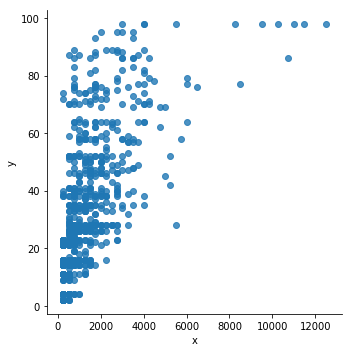

In [9]:
sn.lmplot( "x", "y", data=df, fit_reg=False, size = 5 )

In [10]:
df.columns

Index(['x', 'y'], dtype='object')

In [11]:
data1.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'donated'],
      dtype='object')

In [12]:
data1.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [13]:
from sklearn.linear_model import LinearRegression

def get_lm( curve, deg = 1 ):

  lreg = LinearRegression()
  lreg.fit( curve.iloc[:,:deg], curve.y )

  lreg_predict_y = lreg.predict( curve.iloc[:,:deg] )

  plt.plot( curve.x, curve.y, 'k.')
  plt.plot( curve.x, lreg_predict_y, 'g-', label='degree ' + str(deg) + 'fit' )
  plt.legend(loc='upper right')

  return lreg

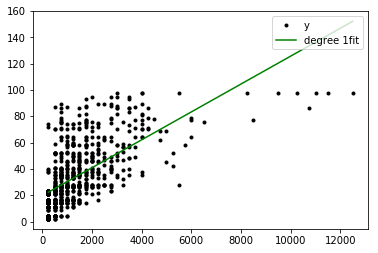

In [14]:
lreg_1 = get_lm(df, 1)


In [15]:
lreg_1.coef_

array([0.01060246])

array([0., 1.])

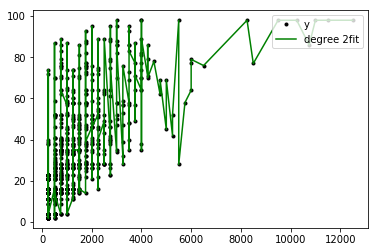

In [16]:
df = df.sort_values( ['x'], ascending = True )

lreg_2 = get_lm(df, 2)
lreg_2.coef_

array([0., 1.])

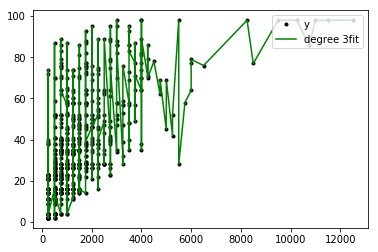

In [17]:
lreg_3 = get_lm(df, 3 )
lreg_3.coef_

array([0., 1.])

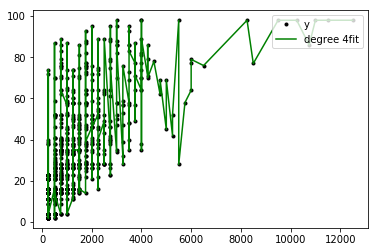

In [18]:
lreg_4 = get_lm(df, 4 )
lreg_4.coef_

array([0., 1.])

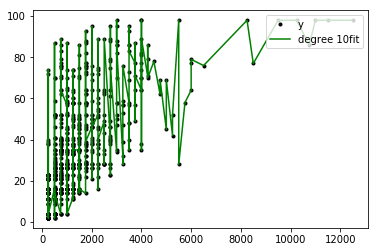

In [19]:
lreg_10 = get_lm(df, 10 )
lreg_10.coef_

In [20]:
#model is overfitted , such model are difficult to generalization
from sklearn import metrics
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( data1.iloc[:,:-2], data1['Time (months)'],test_size = 0.40,random_state = 100 )

In [21]:
train_X.iloc[:,:5].head( 5 )

,Recency (months),Frequency (times),Monetary (c.c. blood)
493,23,3,750
517,4,33,8250
27,4,12,3000
381,14,1,250
96,3,17,4250


In [22]:
test_X.iloc[:,:5].head(5)

,Recency (months),Frequency (times),Monetary (c.c. blood)
568,4,6,1500
109,2,10,2500
546,7,14,3500
19,2,3,750
416,16,1,250


In [23]:
train_y.iloc[:].head( 5 )

493    89
517    98
27     34
381    14
96     86
Name: Time (months), dtype: int64

In [24]:
test_y.iloc[:].head( 5 )

568    35
109    64
546    48
19      4
416    16
Name: Time (months), dtype: int64

In [25]:
from sklearn import metrics
lreg = LinearRegression()

In [26]:
data1.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [37]:
def get_detail_df():
 all_reg_df = pd.DataFrame( {'deg': [],'intercept': [],'Recency (months)':[], 'Frequency (times)':[], 'Monetary (c.c. blood)':[], 'Time (months)':[], 'donated':[], 'train_rmse':[],'test_rmse':[],'train_r2':[],'test_r2':[] } )
 all_reg_df.columns = ['deg', 'intercept','Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)', 'donated', 'train_rmse', 'test_rmse', 'train_r2', 'test_r2' ]
 return all_reg_df

In [38]:
len( get_detail_df().columns )

11

In [41]:
def get_lm_details( trainX, trainY, testX, testY, reg_df, deg = 1 ):

  lreg = LinearRegression()
  lreg.fit( trainX.iloc[:,:deg], trainY )

  predict_y_train = lreg.predict( trainX.iloc[:,:deg] )
  predict_y_test = lreg.predict( testX.iloc[:,:deg] )

  lm_series =  ( [deg] +
      [lreg.intercept_] +
      list(lreg.coef_) +
      [np.nan for i in range( 1, 6 - deg )] +
      [ np.sqrt( metrics.mean_squared_error( trainY, predict_y_train ) ),
      np.sqrt( metrics.mean_squared_error( testY, predict_y_test ) ),
      metrics.r2_score( trainY, predict_y_train ),
      metrics.r2_score( testY, predict_y_test ) ] )

#    reg_df = reg_df.append( pd.DataFrame( lm_series).T )
  reg_df = reg_df.append( pd.Series( lm_series),  ignore_index = True )

  return lm_series, reg_df

In [42]:
all_df = get_detail_df()
for i in range( 1, 6 ):
  lm_series, all_df = get_lm_details( train_X, train_y, test_X, test_y, all_df, i )

In [43]:
all_df

,deg,intercept,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),donated,train_rmse,test_rmse,train_r2,...,1,2,3,4,5,6,7,8,9,10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.746000,0.449674,NaN,NaN,NaN,NaN,23.758902,24.471215,0.019252,0.033568
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.253793,0.954252,3.076832,NaN,NaN,NaN,17.020940,18.372665,0.496648,0.455241
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.253793,0.954252,0.000049,0.012307,NaN,NaN,17.020940,18.372665,0.496648,0.455241
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.253793,0.954252,0.000049,0.012307,NaN,17.020940,18.372665,0.496648,0.455241,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.253793,0.954252,0.000049,0.012307,17.02094,18.372665,0.496648,0.455241,NaN,NaN


In [45]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 22):
    print(all_df)

   deg  intercept  Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
0  NaN        NaN               NaN                NaN                    NaN   
1  NaN        NaN               NaN                NaN                    NaN   
2  NaN        NaN               NaN                NaN                    NaN   
3  NaN        NaN               NaN                NaN                    NaN   
4  NaN        NaN               NaN                NaN                    NaN   

   Time (months)  donated  train_rmse  test_rmse  train_r2  test_r2    0  \
0            NaN      NaN         NaN        NaN       NaN      NaN  1.0   
1            NaN      NaN         NaN        NaN       NaN      NaN  2.0   
2            NaN      NaN         NaN        NaN       NaN      NaN  3.0   
3            NaN      NaN         NaN        NaN       NaN      NaN  4.0   
4            NaN      NaN         NaN        NaN       NaN      NaN  5.0   

           1         2         3         4         5    

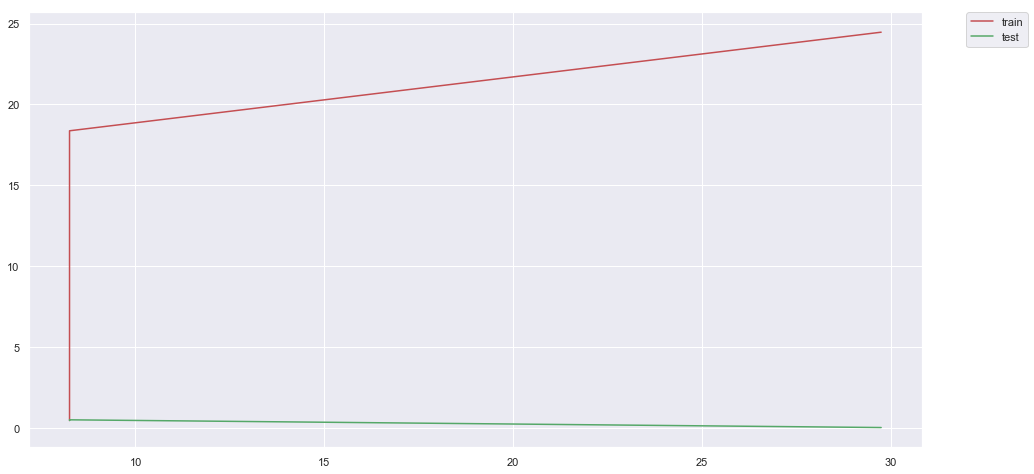

In [54]:
sn.set(rc={"figure.figsize": (16, 8)});
plt.plot( all_df.iloc[:,12],all_df.iloc[:,19],label='train',color = 'r' )
plt.plot( all_df.iloc[:,12],all_df.iloc[:,20],label='test',color = 'g' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)

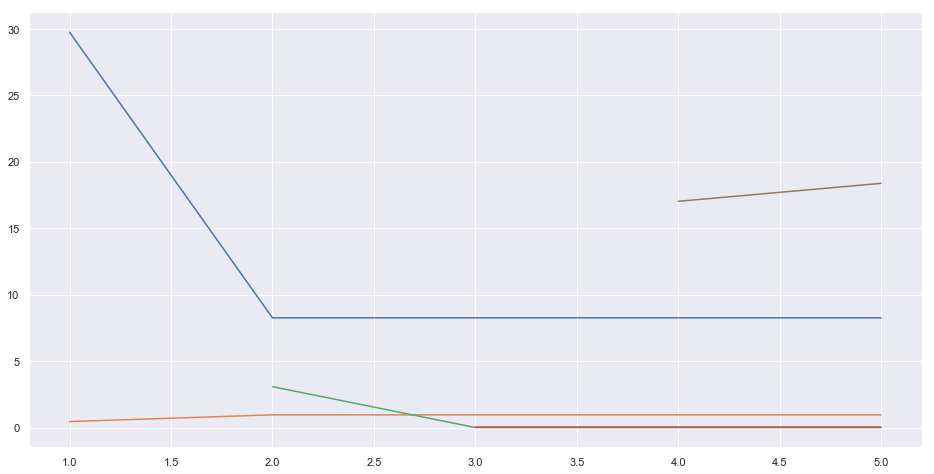

In [80]:

#sn.set(rc={"figure.figsize": (16, 8)});
for i in range(12,18):
  column_name = '3' + '4'+ '5' + '6'
  plt.plot( list(range(1,6)),all_df.iloc[:,i][0:5],label='coefficients')

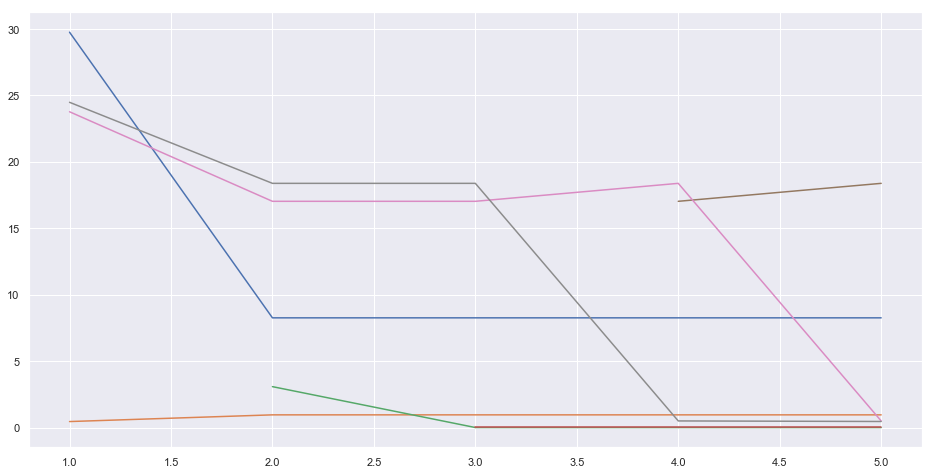

In [79]:

sn.set(rc={"figure.figsize": (16, 8)});

for i in range(12,20):
  column_name = '3' + '4'+ '5' + '6'
  plt.plot( list(range(1,6)),all_df.iloc[:,i][0:5],label='coefficients')

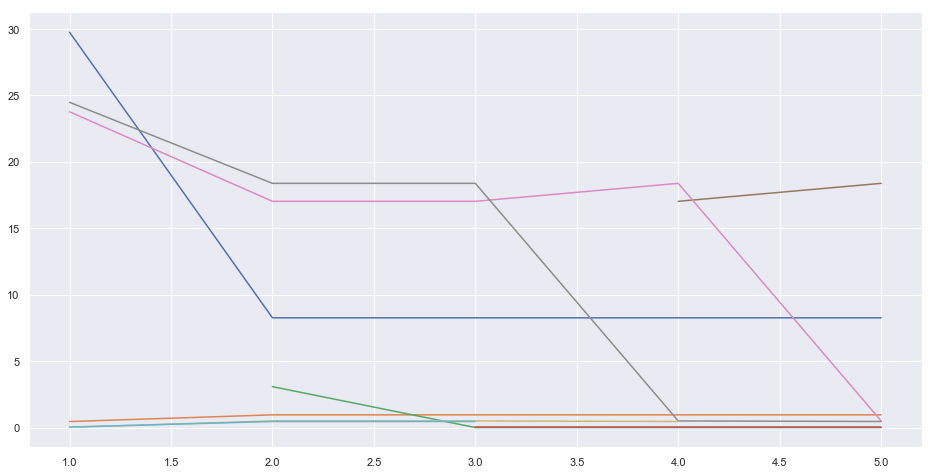

In [78]:

sn.set(rc={"figure.figsize": (16, 8)});

for i in range(12,22):
  column_name = '3' + '4'+ '5' + '6'
  plt.plot( list(range(1,6)),all_df.iloc[:,i][0:5],label='coefficients')

In [77]:
#Learning with Ridge Regularization
from sklearn.linear_model import Ridge


In [110]:

def get_lm_ridge( curve, alpha = 0.01, deg = 1 ):

  lreg = Ridge( alpha )
  lreg.fit( curve.iloc[:,:12], data1['Time (months)'] )

  lreg_predict_y = lreg.predict( curve.iloc[:,:12] )

  plt.plot( data1['Monetary (c.c. blood)'], data1['Time (months)'], 'k.')
  plt.plot(data1['Monetary (c.c. blood)'] , lreg_predict_y, 'g-', label='degree ' + str(deg) + 'fit' )
  plt.legend(loc='upper right')

  return lreg

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

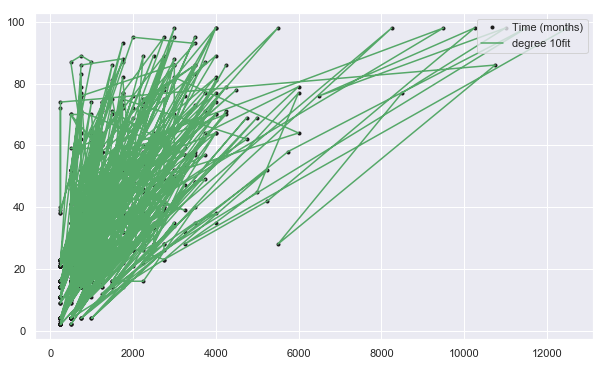

In [111]:
sn.set(rc={"figure.figsize": (10, 6)});
get_lm_ridge( data1, deg = 10 )

In [117]:
from sklearn.linear_model import Ridge

def get_lm_ridge_details( trainX, trainY, testX, testY, reg_df, deg = 1, alpha = 0.01 ):

  lreg = Ridge( alpha )
  lreg.fit( trainX.iloc[:,:deg], trainY )

  predict_y_train = lreg.predict( trainX.iloc[:,:deg] )
  predict_y_test = lreg.predict( testX.iloc[:,:deg] )

  lm_series =  ( [deg] +
      [lreg.intercept_] +
      list(lreg.coef_) +
      [np.nan for i in range( 1, 6 - deg )] +
      [ np.sqrt( metrics.mean_squared_error( trainY, predict_y_train ) ),
      np.sqrt( metrics.mean_squared_error( testY, predict_y_test ) ),
      metrics.r2_score( trainY, predict_y_train ),
      metrics.r2_score( testY, predict_y_test ) ] )

#    reg_df = reg_df.append( pd.DataFrame( lm_series).T )
  reg_df = reg_df.append( pd.Series( lm_series ),  ignore_index = True )

  return lm_series, reg_df

In [118]:
all_ridge_df = get_detail_df()

for i in range( 1, 6):
  lm_ridge_series, all_ridge_df = get_lm_ridge_details( train_X, train_y, test_X, test_y, all_ridge_df, i )

In [119]:
all_ridge_df.head(4)

,deg,intercept,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),donated,train_rmse,test_rmse,train_r2,...,1,2,3,4,5,6,7,8,9,10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.746002,0.449674,NaN,NaN,NaN,NaN,23.758902,24.471215,0.019252,0.033568
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.253814,0.954252,3.076829,NaN,NaN,NaN,17.020940,18.372662,0.496648,0.455241
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.253797,0.954252,0.000049,0.012307,NaN,NaN,17.020940,18.372664,0.496648,0.455241
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.253797,0.954252,0.000049,0.012307,NaN,17.02094,18.372664,0.496648,0.455241,NaN


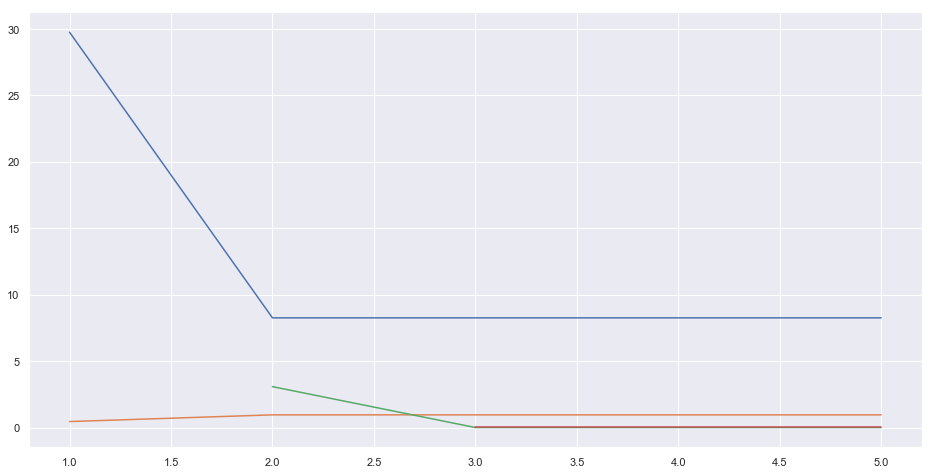

In [120]:
sn.set(rc={"figure.figsize": (16, 8)});

for i in range(12,17):
  column_name = '3' + '4'+ '5' + '6'
  plt.plot( list(range(1,6)),all_df.iloc[:,i][0:5],label='coefficients')

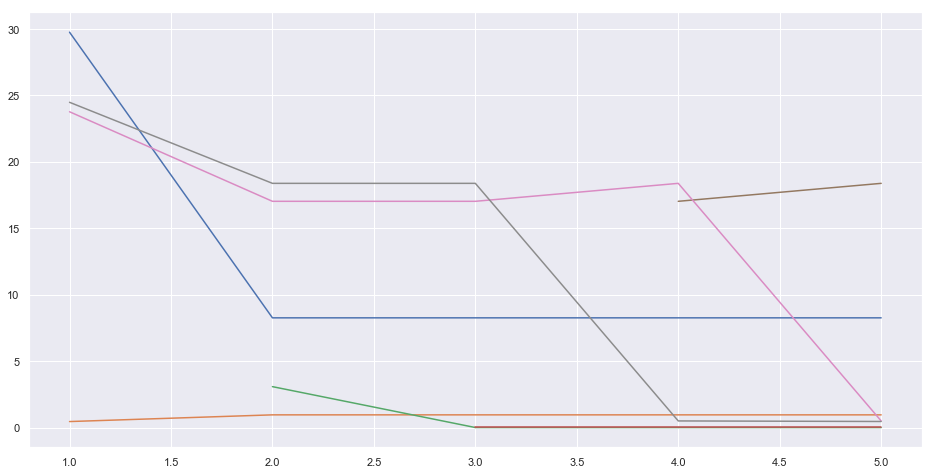

In [121]:
sn.set(rc={"figure.figsize": (16, 8)});

for i in range(12,20):
  column_name = '3' + '4'+ '5' + '6'
  plt.plot( list(range(1,6)),all_df.iloc[:,i][0:5],label='coefficients')

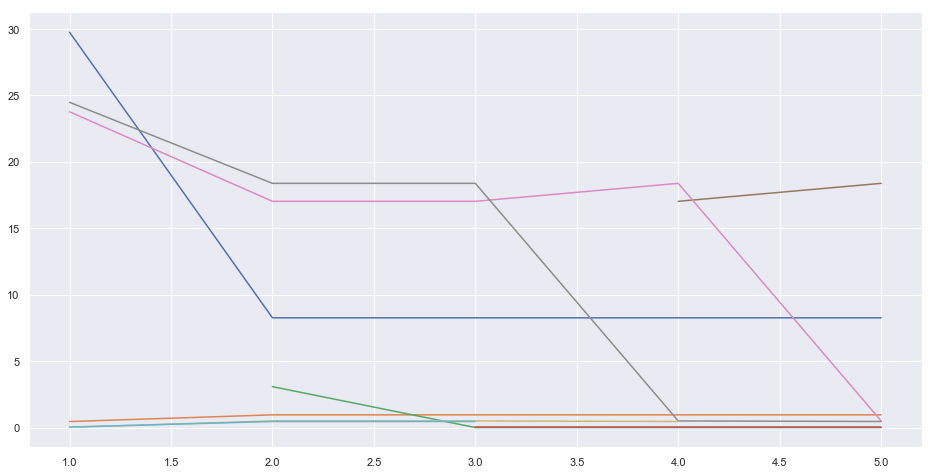

In [122]:
sn.set(rc={"figure.figsize": (16, 8)});

for i in range(12,22):
  column_name = '3' + '4'+ '5' + '6'
  plt.plot( list(range(1,6)),all_df.iloc[:,i][0:5],label='coefficients')

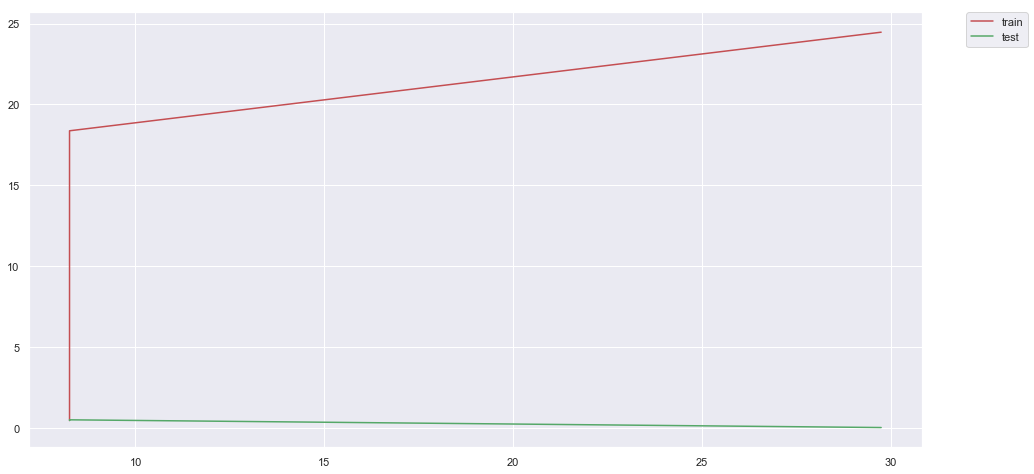

In [124]:
sn.set(rc={"figure.figsize": (16, 8)});
plt.plot( all_df.iloc[:,12],all_df.iloc[:,19],label='train',color = 'r' )
plt.plot( all_df.iloc[:,12],all_df.iloc[:,20],label='test',color = 'g' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)

In [125]:
from sklearn.linear_model import Lasso

def get_lm_lasso( curve, alpha = 1, deg = 1 ):

  lreg = Lasso( alpha )
  lreg.fit( curve.iloc[:,:12], data1['Time (months)'] )

  lreg_predict_y = lreg.predict( curve.iloc[:,:12] )

  plt.plot( data1['Monetary (c.c. blood)'], data1['Time (months)'], 'k.')
  plt.plot(data1['Monetary (c.c. blood)'] , lreg_predict_y, 'g-', label='degree ' + str(deg) + 'fit' )
  plt.legend(loc='upper right')

  return lreg

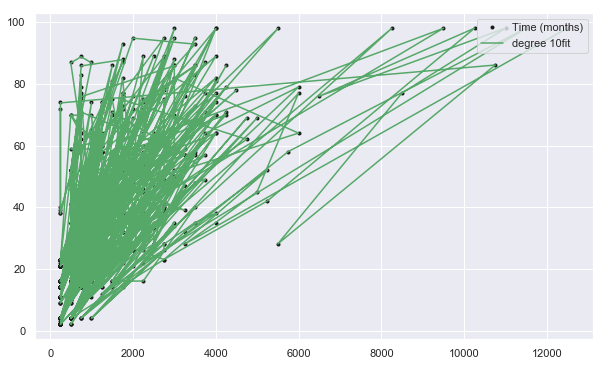

In [129]:
sn.set(rc={"figure.figsize": (10, 6)});
lasso_reg =get_lm_lasso( data1, deg = 10 )

In [130]:
lasso_reg.coef_

array([ 0.00000000e+00, -0.00000000e+00,  2.98620207e-05,  9.97179404e-01,
       -0.00000000e+00])

In [133]:
from sklearn.linear_model import Lasso
def get_lm_lasso_details( trainX, trainY, testX, testY, reg_df, deg = 1, alpha = 0.01 ):

  lreg = Lasso( alpha, max_iter=10000, tol=0.001 )
  lreg.fit( trainX.iloc[:,:deg], trainY )

  predict_y_train = lreg.predict( trainX.iloc[:,:deg] )
  predict_y_test = lreg.predict( testX.iloc[:,:deg] )

  lm_series =  ( [deg] +
      [lreg.intercept_] +
      list(lreg.coef_) +
      [np.nan for i in range( 1, 21 - deg )] +
      [ np.sqrt( metrics.mean_squared_error( trainY, predict_y_train ) ),
      np.sqrt( metrics.mean_squared_error( testY, predict_y_test ) ),
      metrics.r2_score( trainY, predict_y_train ),
      metrics.r2_score( testY, predict_y_test ) ] )

#    reg_df = reg_df.append( pd.DataFrame( lm_series).T )
  reg_df = reg_df.append( pd.Series( lm_series),  ignore_index = True )
  return lm_series, reg_df

In [134]:
all_lasso_df = get_detail_df()
for i in range( 1, 6 ):
  lm_lasso_series, all_lasso_df = get_lm_lasso_details( train_X, train_y, test_X, test_y, all_lasso_df, i )

In [137]:
all_lasso_df.iloc[0:10,1:23]

,intercept,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),donated,train_rmse,test_rmse,train_r2,test_r2,...,2,3,4,5,6,7,8,9,10,11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.449492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.954001,3.07643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.954058,3.07514,0.000007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.954058,3.07514,0.000007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.954058,3.07514,0.000007,NaN,NaN,NaN,NaN,NaN,NaN,NaN


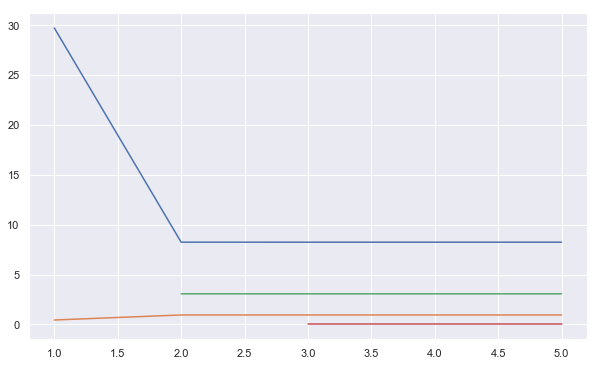

In [144]:
for i in range(12,17):
  column_name = '3'+'4'+'5'+'6'
  plt.plot( list(range(1,6)),all_lasso_df.iloc[:,i][0:5],label='coefficients')

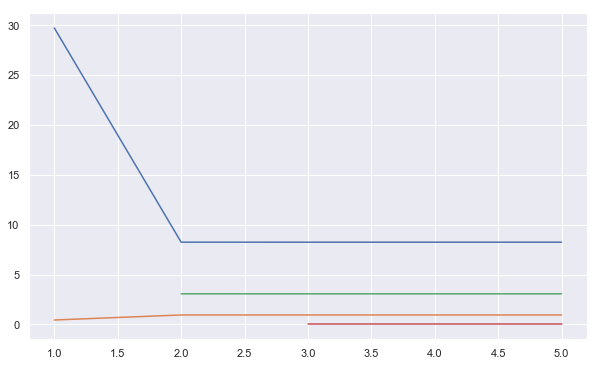

In [145]:
for i in range(12,22):
  column_name = '3'+'4'+'5'+'6'
  plt.plot( list(range(1,6)),all_lasso_df.iloc[:,i][0:5],label='coefficients')

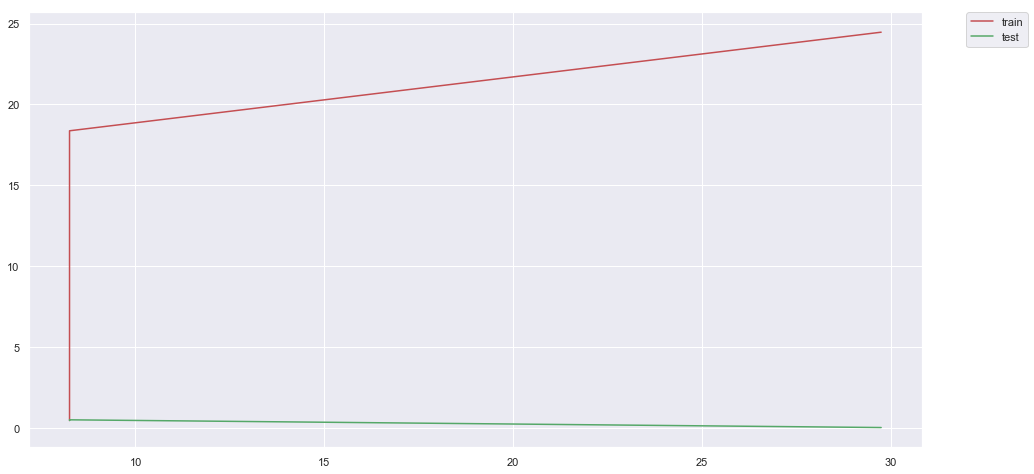

In [157]:
sn.set(rc={"figure.figsize": (16, 8)});
plt.plot( all_df.iloc[:,12],all_df.iloc[:,19],label='train',color = 'r' )
plt.plot( all_df.iloc[:,12],all_df.iloc[:,20],label='test',color = 'g' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)

ElasticNet(alpha=0.02, copy_X=True, fit_intercept=True, l1_ratio=0.4,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

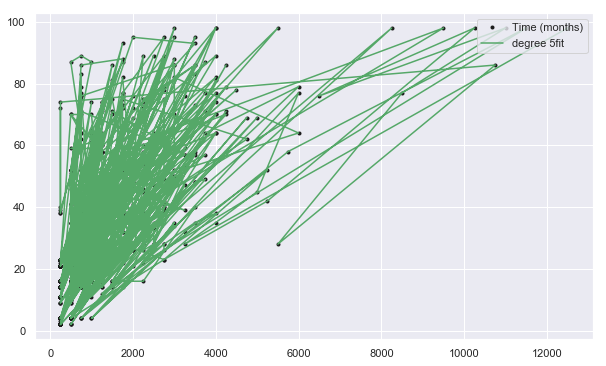

In [162]:
from sklearn.linear_model import ElasticNet
def get_lm_enet( curve, alpha = 0.02, l1_ratio = 0.4, deg = 1 ):

  lreg = ElasticNet( alpha, l1_ratio )
  lreg.fit( curve.iloc[:,:deg], data1['Time (months)'] )

  lreg_predict_y = lreg.predict( data1.iloc[:,:deg] )

  plt.plot( data1['Monetary (c.c. blood)'], data1['Time (months)'], 'k.')
  plt.plot( data1['Monetary (c.c. blood)'], lreg_predict_y, 'g-', label='degree ' + str(deg) + 'fit' )
  plt.legend(loc='upper right')

  return lreg

sn.set(rc={"figure.figsize": (10, 6)});

get_lm_enet( data1, deg = 5 )

In [167]:
def get_lm_enet_details( trainX, trainY, testX, testY, reg_df, deg = 1, alpha = 0.02, l1_ratio = 0.4 ):

  lreg = ElasticNet( alpha = alpha, l1_ratio = l1_ratio )
  lreg.fit( trainX.iloc[:,:deg], trainY )

  predict_y_train = lreg.predict( trainX.iloc[:,:deg] )
  predict_y_test = lreg.predict( testX.iloc[:,:deg] )

  lm_series =  ( [deg] +
      [lreg.intercept_] +
      list(lreg.coef_) +
      [np.nan for i in range( 1, 6 - deg )] +
      [ np.sqrt( metrics.mean_squared_error( trainY, predict_y_train ) ),
      np.sqrt( metrics.mean_squared_error( testY, predict_y_test ) ),
      metrics.r2_score( trainY, predict_y_train ),
      metrics.r2_score( testY, predict_y_test ) ] )

#    reg_df = reg_df.append( pd.DataFrame( lm_series).T )
  reg_df = reg_df.append( pd.Series( lm_series),  ignore_index = True )

  return lm_series, reg_df

In [169]:
all_enet_df = get_detail_df()

for i in range( 1, 6 ):
  lm_enet_series, all_enet_df = get_lm_enet_details( train_X, train_y, test_X, test_y, all_enet_df, i )

C:\Users\shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\shrikant\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [171]:
all_enet_df.iloc[0:10,1:23]


,intercept,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),donated,train_rmse,test_rmse,train_r2,test_r2,...,1,2,3,4,5,6,7,8,9,10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.748273,0.449430,NaN,NaN,NaN,NaN,23.758902,24.471272,0.019252,0.033564
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.268696,0.953623,3.075174,NaN,NaN,NaN,17.020943,18.370891,0.496648,0.455346
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.257869,0.953879,1.860165,0.004866,NaN,NaN,17.020941,18.372355,0.496648,0.455259
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.257869,0.953879,1.860165,0.004866,NaN,17.020941,18.372355,0.496648,0.455259,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.257869,0.953879,1.860165,0.004866,17.020941,18.372355,0.496648,0.455259,NaN,NaN


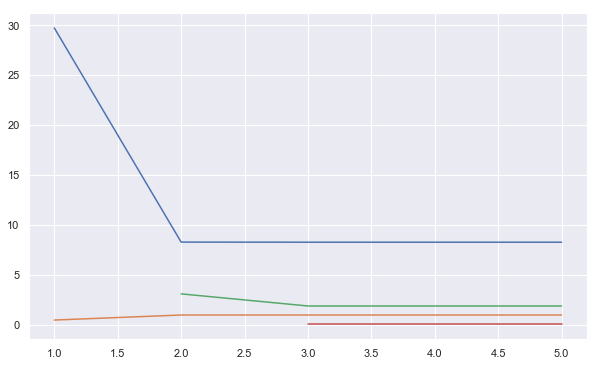

In [174]:
#for i in range(1,11):
#  column_name = 'x' + str(i)
#  plt.plot( list(range(1,11)),all_enet_df[column_name][0:10],label='coefficients')
    
for i in range(12,17):
  column_name = '3'+'4'+'5'+'6'
  plt.plot( list(range(1,6)),all_enet_df.iloc[:,i][0:5],label='coefficients')

plt.plot( all_enet_df.deg,all_enet_df.train_rmse,label='train',color = 'r' )

plt.plot( all_enet_df.deg,all_enet_df.test_rmse,label='test',color = 'g' )

plt.legend(bbox_to_anchor=(1.05, 1),loc=2,borderaxespad=0.)
    